# Smart Lead Scoring Engine

**Aim**: Identifying potential leads for D2C startup.

## Problem Statement

A **D2C startup** develops products using **cutting edge technologies** like **Web 3.0**. Over the past few months, the company has started multiple **marketing campaigns offline and digital** both. As a result, the users have started showing interest in the product on the website. These users with **intent to buy product**(s) are generally known as **leads (Potential Customers)**.
Leads are captured in 2 ways - **Directly and Indirectly**. 

**Direct leads** are captured via forms embedded in the website while **indirect leads** are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.

Now, the marketing & sales team wants to **identify the leads who are more likely to buy the product** so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.

Now, as a **data scientist**, your task at hand is to **predict the propensity to buy a product** based on the user's past activities and user level information.

## About Dataset

You are provided with the leads data of last year containing both direct and indirect leads. Each lead provides information about their activity on the platform, signup information and campaign information. Based on his past activity on the platform, you need to build the predictive model to classify if the user would buy the product in the next 3 months or not.

**Data Dictionary**

You are provided with 3 files - train.csv, test.csv and sample_submission.csv
**Training set**

train.csv contains the leads information of last 1 year from **Jan 2021 to Dec 2021**. And also the **target variable** indicating if the user will buy the product in next 3 months or not 

|Variable|Description|
|---|---|
id|Unique identifier of a lead|
created_at|Date of lead dropped|
signup_date|Sign up date of the user on the website|
campaign_var (1 and 2)|campaign information of the lead|
products_purchased|No. of past products purchased at the time of dropping the lead|
user_activity_var (1 to 12)|Derived activities of the user on the website|
buy|0 or 1 indicating if the user will buy the product in next 3 months or not |

**Test set**

test.csv contains the leads information of the current year from **Jan 2022 to March 2022**. You need to **predict if the lead will buy the product in next 3 months or not**.



|Variable|Description|
|----|----|
id|Unique identifier of a lead
created_at|Date of lead dropped
signup_date|Sign up date of the user on the website
campaign_var (1 and 2)|Campaign information of the lead
products_purchased|No. of past products purchased at the time of dropping the lead
user_activity_var (1 to 12) |Derived activities of the user on the website

**Evaluation metric  of model is F1 score of class 1**.
## importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read datasets into pandas dataframe
train = pd.read_csv('C:/Users/Hp/Documents/datasets/joathon/train_wn75k28.csv')
test = pd.read_csv('C:/Users/Hp/Documents/datasets/joathon/test_Wf7sxXF.csv')

In [4]:
train.shape  # number of rows & columns

(39161, 19)

In [5]:
test.shape   # number of rows & columns

(13184, 18)

In [6]:
train.columns   # columns of train

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy'],
      dtype='object')

In [7]:
train.duplicated().sum()   # chcking duplicated values of train data


0

In [8]:
test.duplicated().sum()   # checking duplicated values of test data

0

In [9]:
train.isnull().sum()              # missing values in train data

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [10]:
test.isnull().sum()            #  sum of missing values in test data

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

In [11]:
train.head()  # first 5 rows of train data

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [12]:
test.head()  # first 5 rows of test data

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [13]:
train.info()   # data types of train along with null values count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [14]:
test.info()   # data types of test along with null values count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

## Data Munging
It is type conversion for variables in larger datasets.Here signup_date,created_at should be timestamp format in test & train data.products_purchased in train & test datasets is categorical discrete value. It has missing values in larger quantity, so we have to replace null values with mode after convert to int.signup_date also have missing values. As it is also categorical ,missing values replace by mode


In [15]:
train['signup_date']= pd.to_datetime(train['signup_date'],format='%Y/%m/%d')   # convert to timestamp or datetime format

In [16]:
train['created_at']= pd.to_datetime(train['created_at'],format='%Y/%m/%d')     # convert to timestamp or datetime format

In [17]:
train['signup_date']=train['signup_date'].fillna(train['signup_date'].mode()[0])     # fill null values with mode

In [18]:
train['signup_date'].isnull().sum()

0

In [19]:
train['products_purchased'].skew()

0.22080299865669342

In [20]:
Here skewness shows approximately symmetric. so we take mean value to replace missing values

SyntaxError: invalid syntax (Temp/ipykernel_10068/3175647892.py, line 1)

In [21]:
train['products_purchased']=train['products_purchased'].fillna(train['products_purchased'].mean()).astype('int')  #fill null with mode

In [22]:
train['products_purchased'].head()   # to verify conversion

0    2
1    2
2    3
3    2
4    2
Name: products_purchased, dtype: int32

In [23]:
test['signup_date']=test['signup_date'].fillna(test['signup_date'].mode()[0])    #fill null values with mode

In [24]:
test['signup_date'].isnull().sum()

0

In [25]:
test['products_purchased']=test['products_purchased'].fillna(test['products_purchased'].mean()).astype('int')  # fill null with mode

In [26]:
test['products_purchased'].head()

0    2
1    3
2    2
3    2
4    2
Name: products_purchased, dtype: int32

In [27]:
test['created_at']= pd.to_datetime(test['created_at'],format='%Y/%m/%d')    # convert to timestamp or datetime format

In [28]:
test['signup_date']= pd.to_datetime(test['signup_date'],format='%Y/%m/%d')    # convert to timestamp or datetime format

In [29]:
train['id'] = train['id'].astype('category')  # id is unique number has no order
test['id'] = test['id'].astype('category')

In [30]:
train.info()   # after conversion verify datatypes & non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39161 non-null  category      
 1   created_at            39161 non-null  datetime64[ns]
 2   campaign_var_1        39161 non-null  int64         
 3   campaign_var_2        39161 non-null  int64         
 4   products_purchased    39161 non-null  int32         
 5   signup_date           39161 non-null  datetime64[ns]
 6   user_activity_var_1   39161 non-null  int64         
 7   user_activity_var_2   39161 non-null  int64         
 8   user_activity_var_3   39161 non-null  int64         
 9   user_activity_var_4   39161 non-null  int64         
 10  user_activity_var_5   39161 non-null  int64         
 11  user_activity_var_6   39161 non-null  int64         
 12  user_activity_var_7   39161 non-null  int64         
 13  user_activity_va

In [31]:
test.info()     # after conversion verify datatypes & non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    13184 non-null  category      
 1   created_at            13184 non-null  datetime64[ns]
 2   campaign_var_1        13184 non-null  int64         
 3   campaign_var_2        13184 non-null  int64         
 4   products_purchased    13184 non-null  int32         
 5   signup_date           13184 non-null  datetime64[ns]
 6   user_activity_var_1   13184 non-null  int64         
 7   user_activity_var_2   13184 non-null  int64         
 8   user_activity_var_3   13184 non-null  int64         
 9   user_activity_var_4   13184 non-null  int64         
 10  user_activity_var_5   13184 non-null  int64         
 11  user_activity_var_6   13184 non-null  int64         
 12  user_activity_var_7   13184 non-null  int64         
 13  user_activity_va

## EDA 
### Data analysis

In [32]:
# statistical analysis
train.describe()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,6.523812,6.452746,2.071832,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,3.472944,2.614296,0.537865,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,8.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [33]:
train.skew()  # to check distribution of data

C:\Users\Hp\AppData\Local\Temp/ipykernel_10068/3844844585.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()  # to check distribution of data


campaign_var_1           0.453380
campaign_var_2           0.242095
products_purchased       0.763673
user_activity_var_1      0.626940
user_activity_var_2     12.079697
user_activity_var_3      2.615292
user_activity_var_4      9.178034
user_activity_var_5      1.970378
user_activity_var_6      0.544753
user_activity_var_7      0.995556
user_activity_var_8      1.720109
user_activity_var_9      9.188634
user_activity_var_10    51.067930
user_activity_var_11     1.691419
user_activity_var_12    42.156638
buy                      4.081071
dtype: float64

|column| skewness| symmetric or skewed|
---|---|---|
|campaign_var_1 |0.45| approx symmetric|
|campaign_var_2|0.24|approx symmetric|
|products_purchased|0.7|slightly skewed|
|user_activity_var_1|0.6| slightly skewed|
user_activity_var_2|12.0| completely skewed|
|user_activity_var_3|2.6|completely skewed|
user_activity_var_4|9.17| completely skewed|
|user_activity_var_5|1.97|completely skewed|
user_activity_var_6|0.5| slightly skewed|
|user_activity_var_7|0.9|slightly skewed|
user_activity_var_8|1.72| completely skewed|
|user_activity_var_9|9.18|completely skewed|
user_activity_var_10|51.06| completely skewed|
|user_activity_var_11|1.69|completely skewed|
user_activity_var_12|42.15| completely skewed|
|buy|4.0|completely skewed|

From the skweness values, we can say daatset is almost skewed, so we need to perform normalization

In [34]:
train.median()     # for skewed data, missing values will replace by this. but we dont have missing in daatset

C:\Users\Hp\AppData\Local\Temp/ipykernel_10068/822390299.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  train.median()     # for skewed data, missing values will replace by this. but we dont have missing in daatset
C:\Users\Hp\AppData\Local\Temp/ipykernel_10068/822390299.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.median()     # for skewed data, missing values will replace by this. but we dont have missing in daatset


campaign_var_1          6.0
campaign_var_2          6.0
products_purchased      2.0
user_activity_var_1     0.0
user_activity_var_2     0.0
user_activity_var_3     0.0
user_activity_var_4     0.0
user_activity_var_5     0.0
user_activity_var_6     0.0
user_activity_var_7     0.0
user_activity_var_8     0.0
user_activity_var_9     0.0
user_activity_var_10    0.0
user_activity_var_11    0.0
user_activity_var_12    0.0
buy                     0.0
dtype: float64

In [35]:
## Data analysis throgh visualization

<AxesSubplot:xlabel='created_at', ylabel='products_purchased'>

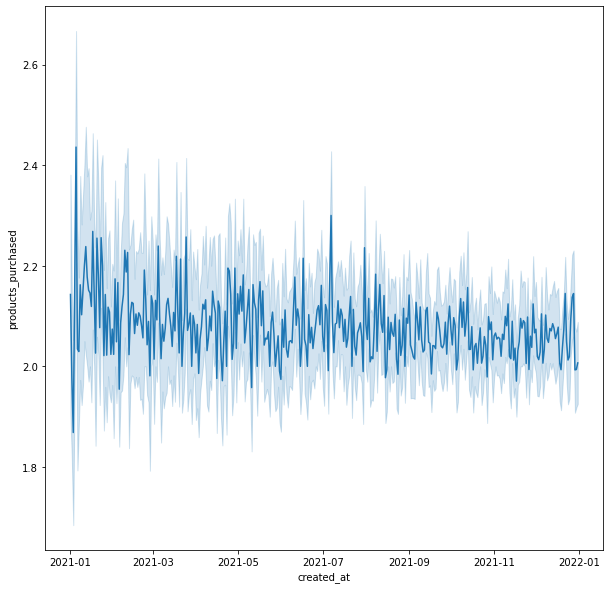

In [36]:
plt.figure(figsize=(10,10))
sns.lineplot(x= train['created_at'], y=train['products_purchased'])  # trend between products purchased & user account created at

<AxesSubplot:xlabel='signup_date', ylabel='products_purchased'>

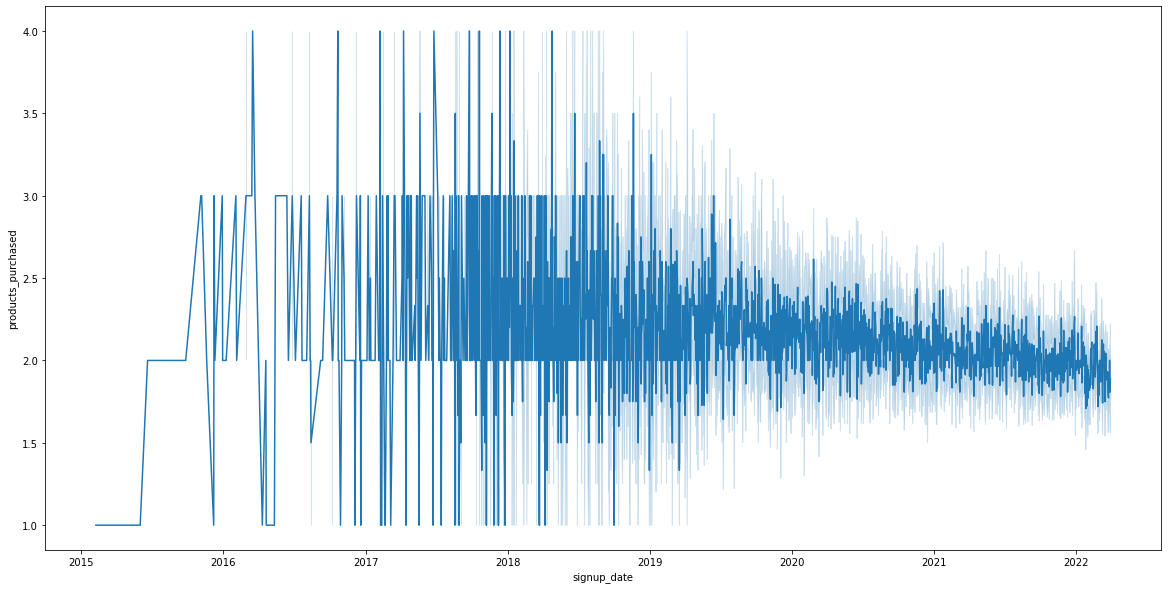

In [38]:
plt.figure(figsize=(20,10))
sns.lineplot(x= train['signup_date'], y=train['products_purchased'])   # trend of products purchased on signup date

Here,products purchased are reducing by increasing year. In 2021 to 2022, products purchased become less,lies between 1.5 to 3.from 2016 to 2019, products purchased are more. it lies between 1 tp 4.so sales are decreasing . we need to focus on potential customers and increase oue short span sales.

In [39]:
train.corr()  # to find relation between variables

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
campaign_var_1,1.000000,0.561489,-0.027047,0.024100,-0.034548,-0.012670,-0.033510,-0.023116,0.029665,-0.072600,-0.014276,-0.058264,-0.004831,-0.022000,-0.006369,-0.087202
campaign_var_2,0.561489,1.000000,0.001733,-0.032969,-0.039833,-0.008046,-0.038928,-0.030990,0.067304,-0.053462,-0.033848,-0.057942,-0.009879,-0.003890,-0.008228,-0.080064
products_purchased,-0.027047,0.001733,1.000000,-0.009926,0.007620,0.002928,0.007469,-0.003059,0.002974,0.009767,-0.012464,0.007955,0.004665,-0.000537,-0.005170,0.003556
user_activity_var_1,0.024100,-0.032969,-0.009926,1.000000,0.014599,-0.025950,0.016656,-0.015441,-0.190784,-0.085343,-0.047157,0.034783,0.012811,-0.062915,0.002535,0.044811
user_activity_var_2,-0.034548,-0.039833,0.007620,0.014599,1.000000,-0.001075,0.132108,0.060982,-0.005297,-0.020153,-0.035306,0.155794,0.046324,0.085794,0.024440,0.354627
user_activity_var_3,-0.012670,-0.008046,0.002928,-0.025950,-0.001075,1.000000,0.003023,0.023117,-0.050132,-0.006306,-0.025562,0.003898,0.019152,-0.027212,0.013261,0.005174
user_activity_var_4,-0.033510,-0.038928,0.007469,0.016656,0.132108,0.003023,1.000000,0.071339,-0.021669,-0.004572,-0.039370,0.204941,0.046924,0.067085,0.037937,0.394706
user_activity_var_5,-0.023116,-0.030990,-0.003059,-0.015441,0.060982,0.023117,0.071339,1.000000,-0.078928,-0.007705,-0.031585,0.074189,0.028037,0.021225,0.022972,0.164972
user_activity_var_6,0.029665,0.067304,0.002974,-0.190784,-0.005297,-0.050132,-0.021669,-0.078928,1.000000,-0.169651,-0.062460,-0.013304,0.001175,-0.076816,0.001938,-0.010951
user_activity_var_7,-0.072600,-0.053462,0.009767,-0.085343,-0.020153,-0.006306,-0.004572,-0.007705,-0.169651,1.000000,-0.035982,-0.010222,0.002007,-0.063410,0.006371,-0.028428


From correlation, we can see there is no specific relation between variables. so we cant select one variable for modelling as feature. we have to use all numerical values for modelling.

In [40]:
 # Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split


create a column for the buy in test
Standardize the data
Split into training data and test data


In [41]:
X=pd.DataFrame(train[['id','campaign_var_1', 'campaign_var_2',
       'products_purchased',  'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12',]])
X.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,1,1,2,2,0,0,0,0,0,0,1,1,0,0,0,0
1,2,2,1,2,1,0,1,0,0,0,1,0,0,0,0,0
2,3,9,3,3,1,0,0,0,0,0,0,0,0,0,0,0
3,4,6,7,2,0,0,0,0,0,0,0,0,0,0,0,0
4,5,4,6,2,0,0,0,0,0,0,1,0,0,0,1,0


Here, date variables are not used in modelling,buy is independent variable, we have to find its labels, so we dont use in X.

Create a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column']).

In [42]:
Y=train['buy'].to_numpy()
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Standardize the data in X then reassign it to the variable X using the transform provided below**

In [43]:
from sklearn.preprocessing import StandardScaler
transform = preprocessing.StandardScaler()

In [44]:
X=StandardScaler().fit_transform(X)

We split the data into training and testing data using the function train_test_split. The training data is divided into validation data, a second set used for validating data; 

Use the function train_test_split to split the data X and Y into training and validating data. Set the parameter test_size to 0.2 and random_state to 2. The training data and validating data should be assigned to the following labels.

In [45]:
# Split features and value
# when trying to predict column "buy" 
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [46]:
Y_test.shape

(7833,)

In [47]:
X_test.shape  #testing data 

(7833, 16)

In [48]:
X_train.shape   # traing data

(31328, 16)

In [49]:
Y_train.shape

(31328,)

In [50]:
#test dataset
t= pd.DataFrame(test[['id','campaign_var_1', 'campaign_var_2',
       'products_purchased',  'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12',]])

Here we dont take date columns,because it is not used in ml modeling

In [51]:
t.head()   # display top 5 rows

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2,2,2,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,4,7,3,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,8,7,2,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,9,8,2,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,4,5,2,1,0,0,0,0,0,0,0,0,0,0,0


In [52]:
t=StandardScaler().fit_transform(t)     # standardize test dataset for predicting model

In [53]:
from sklearn.ensemble import RandomForestClassifier  # importing rfc from ensemble module
X_train,X_val,y_train,y_val=train_test_split(X,Y,test_size=0.33664)
model=RandomForestClassifier()   # instantiate model
model.fit(X_train,y_train)  # fit on the train data
model.predict(X_val)    #Predict on validation set
y_pred = model.predict(t)   # Predict on test set
from sklearn import metrics  # to find accuracy or error
print("accuracy of model", metrics.accuracy_score(y_val,y_pred))

accuracy of model 0.9274878640776699


In [54]:
# Since RF Classifier accuracy is 92%, it is good model.
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
from sklearn.metrics import f1_score   # for calculating f1 score
f1_score(y_val, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

0.040160642570281124

In [56]:
f1_score(y_val,y_pred, average='micro')

0.9274878640776699

In [57]:
f1_score(y_val,y_pred, average='macro')

0.5012406555118472

In [58]:
f1_score(y_val,y_pred,pos_label=1, average='micro')  #for buy class 1

0.9274878640776699

In [59]:
f1_score(y_val,y_pred, average='weighted')

0.9172758370920102

In [60]:
f1_score(y_val,y_pred,pos_label=1, average='weighted')  # for buy class=1

0.9172758370920102

In [61]:
f1_score(y_val,y_pred, average=None)     

array([0.96232067, 0.04016064])

In [62]:
f1_score(y_val,y_pred,pos_label=1, average=None)  # for but class 1

array([0.96232067, 0.04016064])

From above f1 scores , actually f1 score by default calculate for 1.here best f1_score is with average='micro' with 0.92 which is near to 1 . f1 score near o 1 is good model

In [63]:
test['buy'] =y_pred       # creating column of buy with predicted values in test dataset

In [64]:
test.head()           # first 5 rows to display

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,39162,2022-01-01,2,2,2,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0,1
1,39163,2022-01-01,4,7,3,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0,0
2,39164,2022-01-01,8,7,2,2022-03-06,0,0,0,0,1,1,0,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0,1
4,39166,2022-01-01,4,5,2,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
buy_2 = pd.DataFrame(test[['id','buy']])   # using 2 columns id,buy save into buy_2 data frame
buy_2.head() # first 5 rows
buy_2.shape

(13184, 2)

In [66]:
buy_2.to_csv('buy_2.csv',index=False)    # saving dataframe to csv file

# SUMMARY
Here we have 2 datasets of train & test seperately, in which train has label of buy ,test doesnt have, we need to predict. we read data into pandas dataframe. we did basic exploration of data by exploring shape,columns,missing values. Data munging done by converting data types of created at , signup date to timestamp. fill null values with respective mean & median respective of variable symmetric & skewed data. we examine trend of products purchased for signup date & created at. we can say it is decreasing from 2019 to 2021. so we need to focus on potential custumers or lead , to increase short term sales for next 3 months. we need to predict who will likely to purchase products in next 3 months from their past data. we need to standardize data for machime learning. As we dont have label for test, we used RF classsifier & calculate accuracy of train data. here train data splits into training & validating test. This validating model used to predict label for test. Here we got accuracy of RF classifier is 92.35%, which is good model. F1_score with micro average for buy label 1 is 0.92. we created buy label column in test dataframe. we created new dataframe name buy_2 for label  values along with id saved into csv format.

**Author**  **Harsha Veena**

**created on** 4:6:2022

**IDE** Jupyter Notebook

**Programming Language** Python

**ML Model** RandomForestClassifier

**Accuracy** 92%

**F1_score** 0.92

**average** micro

**class** 1